In [59]:
# If not installed, run this cell. It is needed to access Metrics of Hydrologic Skill
#!pip install HydroErr
#!pip show HydroErr

In [60]:
#!pip install --upgrade numpy

In [61]:
import pandas as pd
import HydroErr as he
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
css_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs\Streamflow_Stations\Climate_Sensitive_Stations-GRDC"

filtered_css = pd.read_csv(css_folder + "//CSS_FINAL_SELECTION_WITH_ALL.csv") # Read file with all CSS information
filtered_css

,station_name,station_no,station_id,station_latitude,station_longitude,station_status,river_name,station_elevation,CATCHMENT_SIZE,NAT_STA_ID,GRDCCOUNTRY,Continent,Next_Downstream_Station,CATCHMENT_SIZE2,Priority,k_recession,Val_Analysis
0,ABOVE BOULEAU CREEK,4215070,1069050,50.212223,-119.538610,Active,WHITEMAN CREEK,630.00,"112,00 km²",08NM174,CA - CANADA,North America,4215103,112.00,751,0.910436,Yes
1,"ABOVE CHENEY RESERVOIRE, KS",4125110,1069620,37.863600,-98.014800,Active,NORTH FORK NINNESCAH RIVER,443.80,"2038,30 km²",07144780,US - UNITED STATES,North America,4125801,2038.30,463,0.541509,No
2,ABOVE FORT MCPHERSON,4208040,1068040,67.248886,-134.883060,Active,PEEL RIVER,NaN,"70600,00 km²",10MC002,CA - CANADA,North America,NaN,70600.00,56,0.942386,No
3,"ABOVE HAMBURG, IA",4122160,1068596,40.632500,-95.625800,Active,NISHNABOTNA RIVER,272.54,"7267,50 km²",06810000,US - UNITED STATES,North America,4122903,7267.50,254,0.912838,Yes
4,ABOVE HIGHWAY NO. 8 (DEMPSTER HIGHWAY),4208070,1068049,68.089165,-133.484160,Active,CARIBOU CREEK,NaN,"625,00 km²",10LC007,CA - CANADA,North America,4208020,625.00,595,0.944144,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,"WOODFORDS, CA (WEST FORK)",4118100,1068421,38.769600,-119.833800,Active,CARSON RIVER,1753.97,"169,38 km²",10310000,US - UNITED STATES,North America,NaN,169.38,712,0.900646,Yes
784,XAMBIOA,3649418,1071023,-6.409700,-48.542200,Active,RIO ARAGUAIA,118.00,"364500,00 km²",28300000,BR - BRAZIL,South America,3649419,364500.00,19,0.974853,No
785,XAVANTINA,3649617,1074892,-14.672500,-52.355000,Active,RIO DAS MORTES,266.00,"24950,00 km²",26100000,BR - BRAZIL,South America,3649618,24950.00,119,0.977071,No
786,"YADKIN COLLEGE, NC",4148321,1069484,35.856700,-80.386900,Active,YADKIN RIVER,194.60,"5905,00 km²",02116500,US - UNITED STATES,North America,4148320,5905.00,284,0.896280,Yes


In [63]:
monthly_folder = css_folder + "\\2025-02-13_17-18_Monthly\_DataFrames"
obs_df = pd.read_csv(monthly_folder + "//Joined_Monthly_Sts_DFs.csv", index_col="YYYY-MM") # Observed data
obs_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.384,67.277,NaN,NaN,NaN,1.935,NaN,NaN,NaN
1958-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,359.689,458.993,NaN,NaN,NaN,1.771,NaN,NaN,NaN
1958-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,353.968,283.710,NaN,NaN,NaN,1.813,NaN,NaN,NaN
1958-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,567.067,422.700,NaN,NaN,NaN,1.650,NaN,NaN,NaN
1958-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,510.806,298.016,NaN,NaN,NaN,5.655,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.768,11.174,17.029,3.885,2.418,1.490,19.073
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.716,16.677,13.024,7.144,1.497,1.316,40.910
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.202,9.018,32.953,6.251,3.855,6.647,38.705


In [64]:
wyield_folder = r"Z:\PhD_Datasets&Analysis\Outputs\T&M_WBM\wyield"
sim_df = pd.read_csv(wyield_folder + "\\wyield_zonal_statistics_1958-2023.csv", index_col="station_no") # Simulated data
sim_df

,YEAR,MONTH,DATE,COUNT,MEAN,FLOW_CMS,FLOW_CMS2
station_no,,,,,,,
3617110,1958,1,1958-01,29626.0,373.946142,85025.836548,85947.168686
3617110,1958,2,1958-02,29555.0,228.121757,57426.484006,58048.752099
3617110,1958,3,1958-03,29509.0,200.029459,45481.608598,45974.443122
3617110,1958,4,1958-04,29483.0,100.426328,23595.537717,23851.216791
3617110,1958,5,1958-05,29476.0,51.678385,11750.349726,11877.675434
...,...,...,...,...,...,...,...
6870640,2023,8,2023-08,222.0,4.873334,3.613516,3.539242
6870640,2023,9,2023-09,222.0,70.793220,54.242027,53.127115
6870640,2023,10,2023-10,222.0,35.212370,26.109531,25.572865


In [65]:
sim_df_pivoted = sim_df.reset_index().pivot(index='DATE', columns='station_no', values='FLOW_CMS') # "FLOW_CMS" was calculated using the default area ("CATCHMENT_SIZE2") from GRDC information
sim_df_pivoted.index.name = "YYYY-MM" # Renaming index to YYYY-MM for consistency with observed data
sim_df_pivoted.columns.name = None # Removing the name of the columns to avoid confusion with the observed data
sim_df_pivoted.columns = sim_df_pivoted.columns.map(str) # Converting column names to string for consistency with observed data
sim_df_pivoted

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,85025.836548,45296.391215,7475.114858,357.070251,29751.576359,19556.319480,6887.902289,101.387420,180.674525,2856.678001,...,411.979809,1329.242360,453.799166,20.692303,15.769974,49.369483,14.346645,6.951415,48.345704,67.670061
1958-02,57426.484006,32276.018326,6381.679663,264.206723,16848.678137,10128.627282,1490.685220,6.452626,11.289982,618.924642,...,105.710205,572.173942,472.878040,8.233052,3.371685,13.063932,2.317236,2.249880,15.817566,13.624118
1958-03,45481.608598,29354.258651,6697.469657,207.844370,18962.175449,11396.632987,415.627545,2.804132,4.853850,173.468515,...,92.658897,329.573656,161.962944,5.057757,3.868499,10.336339,2.061175,1.364703,8.798756,15.363445
1958-04,23595.537717,13785.017608,3405.837479,168.043197,32080.347453,23338.354262,1057.674460,29.436888,53.284665,572.518274,...,355.763503,1047.814658,595.095723,3.446639,5.240689,13.600818,2.450638,1.322733,10.278224,20.611195
1958-05,11750.349726,5391.343343,908.687512,3.101452,17331.970330,12835.481411,3619.120984,176.167691,262.649265,2080.772745,...,63.946465,270.698226,192.409643,9.678617,17.673139,105.415040,11.616663,8.268060,37.144873,125.271113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,384.236598,212.450968,25.420863,0.388485,4047.861209,4070.042671,584.468264,32.236084,36.346724,339.909763,...,9.033451,26.441984,17.250065,0.485775,13.915576,3.553283,5.198285,0.603806,4.943876,3.613516
2023-09,481.446301,278.146231,48.728218,1.938917,2688.614758,2396.064217,91.576347,3.870573,5.525489,45.082442,...,6.943680,15.095901,9.582722,7.156831,23.551538,41.066495,10.782284,3.251696,12.027734,54.242027
2023-10,513.685501,267.415858,45.235722,2.437908,511.635033,471.378844,111.541039,4.901541,7.035490,58.444464,...,5.293878,13.734797,15.718678,1.876120,5.285931,24.835559,2.216876,2.641775,31.957355,26.109531


In [66]:
sim_sts = sim_df_pivoted.columns.to_list() # List of stations in the simulated data
len(sim_sts)

788

In [67]:
missing_sts = [col for col in obs_df.columns if col not in sim_sts] # List of stations in the observed data that are not in the simulated data
print(len(missing_sts), missing_sts) # These 22 stations are not in the simulated data as in the previous analysis of recession constant (k) they were discarded.

22 ['3649050', '3649110', '3649160', '3649423', '4119441', '4133200', '4143550', '4149670', '4149780', '4149955', '4150451', '4208160', '4208325', '4208810', '4214900', '4231200', '5101260', '5202160', '5204120', '5204121', '5708125', '6458615']


In [68]:
merged_df = obs_df.add_suffix('_obs').join(sim_df_pivoted.add_suffix('_sim'), how='left', on="YYYY-MM") # Merging observed and simulated data on the index (YYYY-MM)
merged_df

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,411.979809,1329.242360,453.799166,20.692303,15.769974,49.369483,14.346645,6.951415,48.345704,67.670061
1958-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.710205,572.173942,472.878040,8.233052,3.371685,13.063932,2.317236,2.249880,15.817566,13.624118
1958-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.658897,329.573656,161.962944,5.057757,3.868499,10.336339,2.061175,1.364703,8.798756,15.363445
1958-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,355.763503,1047.814658,595.095723,3.446639,5.240689,13.600818,2.450638,1.322733,10.278224,20.611195
1958-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.946465,270.698226,192.409643,9.678617,17.673139,105.415040,11.616663,8.268060,37.144873,125.271113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.033451,26.441984,17.250065,0.485775,13.915576,3.553283,5.198285,0.603806,4.943876,3.613516
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.943680,15.095901,9.582722,7.156831,23.551538,41.066495,10.782284,3.251696,12.027734,54.242027
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.293878,13.734797,15.718678,1.876120,5.285931,24.835559,2.216876,2.641775,31.957355,26.109531


In [69]:
warmup_yrs = 6 # Number of years to be discarded for the warm-up period
initial_year = 1958 + warmup_yrs # Initial year for the analysis

In [70]:
filtered_merged_df = merged_df.loc[merged_df.index >= f'{initial_year}-01']
filtered_merged_df

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1964-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.454026,79.197264,75.082483,4.438743,7.005985,18.172666,3.921736,1.604568,8.088701,21.272603
1964-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111.066421,274.138190,266.949960,3.439206,4.944033,16.279453,3.403581,1.539625,7.812496,19.542394
1964-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188.918005,394.738999,387.947554,1.851991,1.787750,7.736760,1.483688,0.979307,5.069402,8.660715
1964-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234.964953,777.216448,729.190594,2.031727,6.836527,24.117773,3.284570,2.376450,29.158034,23.294879
1964-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.993950,137.408736,63.948125,21.114722,39.003178,112.635260,22.056813,6.400770,4.715254,152.196256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.033451,26.441984,17.250065,0.485775,13.915576,3.553283,5.198285,0.603806,4.943876,3.613516
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.943680,15.095901,9.582722,7.156831,23.551538,41.066495,10.782284,3.251696,12.027734,54.242027
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.293878,13.734797,15.718678,1.876120,5.285931,24.835559,2.216876,2.641775,31.957355,26.109531


In [71]:
print(he.mae.name)
# Compute the mean absolute error of the simulated and observed data.
# Range: 0 ≤ MAE < inf, data units, smaller is better.
# Notes: The ME measures the absolute difference between the simulated data and the observed data.
# For the mean abolute error, a smaller number indicates a better fit to the original data. 
# Also note that random errors do not cancel. Also referred to as an L1-norm.

print(he.rmse.name)
# Compute the root mean square error between the simulated and observed data.
# Range 0 ≤ RMSE < inf, smaller is better.
# Notes: The standard deviation of the residuals. A lower spread indicates that the points are better concentrated around the line of best fit (linear).
# Random errors do not cancel. This metric will highlights larger errors.

print(he.pearson_r.name)
# Compute the pearson correlation coefficient.
# Range: -1 ≤ R (Pearson) ≤ 1. 1 indicates perfect postive correlation, 0 indicates complete randomness, -1 indicate perfect negative correlation.
# Notes: The pearson r coefficient measures linear correlation. It is sensitive to outliers.

print(he.d1.name) # modified index of agreement (d1)
# Compute the the index of agreement (d1).
# Range: 0 ≤ d < 1, does not indicate bias, larger is better.
# Notes: This metric is a modified approach to the Nash-Sutcliffe Efficiency metric. Compared to the other index of agreement (d) it has a reduced impact of outliers.

print(he.nse.name)
# Compute the Nash-Sutcliffe Efficiency.
# Range: -inf < NSE < 1, does not indicate bias, larger is better.
# Notes: The Nash-Sutcliffe efficiency metric compares prediction values to naive predictions (i.e. average value).
# One major flaw of this metric is that it punishes a higher variance in the observed values (denominator).
# This metric is analogous to the mean absolute error skill score (MAESS) using the mean flow as a benchmark.

print(he.kge_2012.name) # modified Kling-Gupta Efficiency (KGE) metric
# Compute the Kling-Gupta efficiency (2012).
# Range: -inf < KGE (2012) < 1, does not indicate bias, larger is better.
# Notes: The modified version of the KGE (2009). Kling proposed this version to avoid cross-correlation between bias and variability ratios.

Mean Absolute Error
Root Mean Square Error
Pearson Correlation Coefficient
Index of Agreement (d1)
Nash-Sutcliffe Efficiency
Kling-Gupta Efficiency (2012)


In [72]:
# Percent bias (PBIAS) measures the average tendency of the simulated values to be larger or smaller than their observed ones.
# The optimal value of PBIAS is 0.0, with low-magnitude values indicating accurate model simulation. Positive values indicate overestimation bias, whereas negative values indicate model underestimation bias
# Percent bias between sim and obs. The result is given in percentage (%)
def pbias(simulated, observed):
    """Calculates the Percent Bias (PBIAS)."""
    return (np.sum(simulated - observed) / np.sum(observed)) * 100

In [73]:
def calculate_stats(fmd, sdp):
    """
    Calculate statistical indices for each station and return a DataFrame with the results.

    Parameters:
    - fmd (pd.DataFrame): Merged DataFrame containing observed and simulated data.
    - sdp (pd.DataFrame): Pivoted DataFrame containing simulated data.

    Returns:
    - pd.DataFrame: DataFrame containing statistical indices for each station.
    """
    # Initialize an empty dictionary to store the results
    stats_results = {
        "Station": [],
        "MAE": [],
        "RMSE": [],
        "Pearson_R": [],
        "D1": [],
        "NSE": [],
        "KGE_2012": [],
        "PBIAS": []
    }

    # Loop through each station/column in sdp
    for station in sdp.columns:
        obs_col = f"{station}_obs"
        sim_col = f"{station}_sim"

        # Check if both observed and simulated columns exist in fmd
        if obs_col in fmd.columns and sim_col in fmd.columns:

            # Drop NaN values to ensure valid calculations
            valid_data = fmd[[obs_col, sim_col]].dropna()
            obs_data = valid_data[obs_col]
            sim_data = valid_data[sim_col]

            # Calculate the statistical indices
            mae = he.mae(sim_data, obs_data)
            rmse = he.rmse(sim_data, obs_data)
            pearson_r = he.pearson_r(sim_data, obs_data)
            d1 = he.d1(sim_data, obs_data)
            nse = he.nse(sim_data, obs_data)
            kge_2012 = he.kge_2012(sim_data, obs_data)
            pbias_value = pbias(sim_data, obs_data)

            # Append the results to the dictionary
            stats_results["Station"].append(station)
            stats_results["MAE"].append(mae)
            stats_results["RMSE"].append(rmse)
            stats_results["Pearson_R"].append(pearson_r)
            stats_results["D1"].append(d1)
            stats_results["NSE"].append(nse)
            stats_results["KGE_2012"].append(kge_2012)
            stats_results["PBIAS"].append(pbias_value)

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_results).set_index("Station")
    return stats_df

# Example usage
stats_df = calculate_stats(filtered_merged_df, sim_df_pivoted)
stats_df

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
Station,,,,,,,
3617110,7606.053741,11233.504913,0.390786,0.440801,-3.294788,-0.086707,18.485310
3617811,3343.033823,5446.133300,0.296982,0.374172,-6.983841,-0.246859,52.320593
3617812,696.811106,1243.227454,0.568678,0.368124,-18.611131,-0.996430,68.183174
3617814,57.582801,79.878367,0.565305,0.306490,-16.560158,-2.534083,3.668131
3618051,6381.192924,8110.748201,0.569773,0.528023,-0.344311,0.399127,-2.345402
...,...,...,...,...,...,...,...
6854601,16.012740,21.944956,0.659392,0.456103,-0.370104,0.516578,30.888300
6854713,2.890670,3.964469,0.650664,0.503269,-0.053856,0.489998,-2.178091
6855411,1.514965,2.318034,0.447398,0.401008,-1.685285,0.263891,26.569688


**Using the default area ("CATCHMENT_SIZE2") from GRDC information and all monthly flow series**

In [74]:
stats_df.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,689.14,928.86,0.60,0.52,-3.37,-0.03,33.32
std,4283.28,5290.73,0.20,0.15,21.77,1.56,163.04
min,0.25,0.39,-0.46,0.05,-501.06,-22.10,-94.85
25%,5.35,9.12,0.53,0.45,-1.91,-0.01,-18.32
50%,22.56,35.91,0.65,0.55,-0.47,0.26,6.42
75%,101.49,143.18,0.73,0.63,0.14,0.43,39.78
max,79456.27,95009.33,0.94,0.81,0.80,0.85,2309.48


In [75]:
# Define the water year for each month
reindexed_obs_df = obs_df.copy()
reindexed_obs_df.index = pd.to_datetime(reindexed_obs_df.index, format='%Y-%m')
reindexed_obs_df['water_year'] = reindexed_obs_df.index.to_series().apply(lambda x: x.year if x.month < 10 else x.year + 1)
reindexed_obs_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,water_year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.384,67.277,NaN,NaN,NaN,1.935,NaN,NaN,NaN,1958
1958-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,359.689,458.993,NaN,NaN,NaN,1.771,NaN,NaN,NaN,1958
1958-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.968,283.710,NaN,NaN,NaN,1.813,NaN,NaN,NaN,1958
1958-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,567.067,422.700,NaN,NaN,NaN,1.650,NaN,NaN,NaN,1958
1958-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,510.806,298.016,NaN,NaN,NaN,5.655,NaN,NaN,NaN,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.768,11.174,17.029,3.885,2.418,1.490,19.073,2023
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.716,16.677,13.024,7.144,1.497,1.316,40.910,2023
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.202,9.018,32.953,6.251,3.855,6.647,38.705,2024


In [76]:
# Count valid months per water year per station
valid_months_per_wy = reindexed_obs_df.groupby('water_year').count()
valid_months_per_wy

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
water_year,,,,,,,,,,,,,,,,,,,,,
1958,0,0,0,0,0,0,0,0,0,0,...,0,9,9,0,0,0,9,0,0,0
1959,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,0,12,0,0,0
1960,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,0,12,0,0,0
1961,0,0,0,0,0,0,0,0,0,0,...,0,12,12,0,0,9,12,0,0,0
1962,0,0,0,0,0,0,0,0,0,0,...,9,12,12,0,0,12,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,10,4,8,0,4,4,4,0,1,1,...,12,12,12,12,12,12,12,12,12,12
2021,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,11,12,12,12
2022,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


In [ ]:
# Create a dictionary with the stations that have 12 valid months
sts_with_full_years = {
    column: valid_months_per_wy.index[valid_months_per_wy[column] == 12].tolist()
    for column in valid_months_per_wy.columns
}
sts_with_full_years

{'3617110': [1969,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2018,
  2019],
 '3617811': [1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019],
 '3617812': [1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014],
 '3617814': [1972,
  1974,
  1975,
  1976,
 

In [78]:
reindexed_sim_df = sim_df_pivoted.copy()
reindexed_sim_df.index = pd.to_datetime(reindexed_sim_df.index, format='%Y-%m')
reindexed_sim_df['water_year'] = reindexed_sim_df.index.to_series().apply(lambda x: x.year if x.month < 10 else x.year + 1)
reindexed_sim_df

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,water_year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,85025.836548,45296.391215,7475.114858,357.070251,29751.576359,19556.319480,6887.902289,101.387420,180.674525,2856.678001,...,1329.242360,453.799166,20.692303,15.769974,49.369483,14.346645,6.951415,48.345704,67.670061,1958
1958-02-01,57426.484006,32276.018326,6381.679663,264.206723,16848.678137,10128.627282,1490.685220,6.452626,11.289982,618.924642,...,572.173942,472.878040,8.233052,3.371685,13.063932,2.317236,2.249880,15.817566,13.624118,1958
1958-03-01,45481.608598,29354.258651,6697.469657,207.844370,18962.175449,11396.632987,415.627545,2.804132,4.853850,173.468515,...,329.573656,161.962944,5.057757,3.868499,10.336339,2.061175,1.364703,8.798756,15.363445,1958
1958-04-01,23595.537717,13785.017608,3405.837479,168.043197,32080.347453,23338.354262,1057.674460,29.436888,53.284665,572.518274,...,1047.814658,595.095723,3.446639,5.240689,13.600818,2.450638,1.322733,10.278224,20.611195,1958
1958-05-01,11750.349726,5391.343343,908.687512,3.101452,17331.970330,12835.481411,3619.120984,176.167691,262.649265,2080.772745,...,270.698226,192.409643,9.678617,17.673139,105.415040,11.616663,8.268060,37.144873,125.271113,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,384.236598,212.450968,25.420863,0.388485,4047.861209,4070.042671,584.468264,32.236084,36.346724,339.909763,...,26.441984,17.250065,0.485775,13.915576,3.553283,5.198285,0.603806,4.943876,3.613516,2023
2023-09-01,481.446301,278.146231,48.728218,1.938917,2688.614758,2396.064217,91.576347,3.870573,5.525489,45.082442,...,15.095901,9.582722,7.156831,23.551538,41.066495,10.782284,3.251696,12.027734,54.242027,2023
2023-10-01,513.685501,267.415858,45.235722,2.437908,511.635033,471.378844,111.541039,4.901541,7.035490,58.444464,...,13.734797,15.718678,1.876120,5.285931,24.835559,2.216876,2.641775,31.957355,26.109531,2024


In [79]:
def calculate_stats_complete_wateryears(sts_with_full_years, yearly_obs_df, yearly_sim_df):
    """
    Calculate statistical indices for each station using all the values of the years
    that are in sts_with_full_years.

    Parameters:
    - sts_with_full_years (dict): Dictionary where keys are station IDs and values are lists of years with full data.
    - yearly_obs_df (pd.DataFrame): DataFrame containing yearly observed values with years as the index.
    - yearly_sim_df (pd.DataFrame): DataFrame containing yearly simulated values with years as the index.

    Returns:
    - dict: A DataFrame where the index are station IDs and values are statistical indices 
    """

    # Initialize an empty dictionary to store the results
    stats_results = {
        "Station": [],
        "MAE": [],
        "RMSE": [],
        "Pearson_R": [],
        "D1": [],
        "NSE": [],
        "KGE_2012": [],
        "PBIAS": []
    }


    for station, years in sts_with_full_years.items():
        # Ensure the station exists in both observed and simulated DataFrames
        if station not in yearly_obs_df.columns or station not in yearly_sim_df.columns:
            continue

        # Filter the years to include only those present in both DataFrames
        valid_years = [year for year in years if year in yearly_obs_df.index and year in yearly_sim_df.index]

        # Filter the observed and simulated data for the valid years
        obs_values = yearly_obs_df.loc[valid_years, station]
        sim_values = yearly_sim_df.loc[valid_years, station]

        # Drop NaN values to ensure valid calculations
        valid_data = pd.DataFrame({'obs': obs_values, 'sim': sim_values}).dropna()

        if not valid_data.empty:
            # Extract the observed and simulated values
            obs_data = valid_data['obs'].values
            sim_data = valid_data['sim'].values
            
            # Calculate the statistical indices
            mae = he.mae(sim_data, obs_data)
            rmse = he.rmse(sim_data, obs_data)
            pearson_r = he.pearson_r(sim_data, obs_data)
            d1 = he.d1(sim_data, obs_data)
            nse = he.nse(sim_data, obs_data)
            kge_2012 = he.kge_2012(sim_data, obs_data)
            pbias_value = pbias(sim_data, obs_data)

            # Append the results to the dictionary
            stats_results["Station"].append(station)
            stats_results["MAE"].append(mae)
            stats_results["RMSE"].append(rmse)
            stats_results["Pearson_R"].append(pearson_r)
            stats_results["D1"].append(d1)
            stats_results["NSE"].append(nse)
            stats_results["KGE_2012"].append(kge_2012)
            stats_results["PBIAS"].append(pbias_value)

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_results).set_index("Station")
    return stats_df

# Example usage
stats_all_years = calculate_stats_complete_wateryears(
    sts_with_full_years,
    reindexed_obs_df.groupby('water_year').mean(),
    reindexed_sim_df.groupby('water_year').mean()
)
# Display the results
stats_all_years

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
Station,,,,,,,
3617110,2010.886113,2439.936979,0.669917,0.443904,-1.099629,0.547622,19.847870
3617811,1330.367517,1644.399951,0.671093,0.306260,-9.085377,0.119527,53.535097
3617812,383.105608,470.381039,0.386939,0.096013,-86.117229,-1.441643,77.932352
3617814,13.546078,17.744915,0.048168,0.213779,-9.340476,-1.174109,4.116683
3618051,1634.306034,2022.213118,0.655375,0.553825,-0.052708,0.507143,-2.159501
...,...,...,...,...,...,...,...
6854601,5.525421,6.465043,0.706016,0.341199,-2.739732,0.569600,30.072823
6854713,0.582973,0.713482,0.706765,0.622406,0.416209,0.706199,-1.807091
6855411,0.474351,0.541411,0.696514,0.386451,-2.174133,0.595354,26.753334


**Using the default area ("CATCHMENT_SIZE2") from GRDC information and complete water-years (aggregated streamflow)**

In [80]:
stats_all_years.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,242.45,285.06,0.70,0.46,-8.53,0.19,33.75
std,1274.55,1518.48,0.18,0.18,88.41,1.56,163.63
min,0.08,0.10,-0.06,0.02,-2358.34,-22.38,-94.72
25%,2.70,3.29,0.62,0.31,-3.41,0.22,-18.46
50%,9.99,12.20,0.75,0.47,-0.39,0.47,6.81
75%,41.25,47.41,0.83,0.62,0.31,0.66,40.52
max,16525.19,20638.34,0.96,0.81,0.85,0.90,2337.67


In [81]:
sim_df_pivoted2 = sim_df.reset_index().pivot(index='DATE', columns='station_no', values='FLOW_CMS2') # "FLOW_CMS2" was determined using the geometrically calculated area ("KM2_MOLWEI") from the shapefile using the projection "Mollweide (World)"
sim_df_pivoted2.index.name = "YYYY-MM" # Renaming index to YYYY-MM for consistency with observed data
sim_df_pivoted2.columns.name = None # Removing the name of the columns to avoid confusion with the observed data
sim_df_pivoted2.columns = sim_df_pivoted2.columns.map(str) # Converting column names to string for consistency with observed data
sim_df_pivoted2

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6742701,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,85947.168686,45645.368052,7733.171975,362.810325,31284.881513,19569.616629,6968.519515,98.510774,184.181972,2784.461259,...,415.139713,1329.361603,445.501778,20.303705,16.341249,48.327923,14.340835,7.008547,47.567274,66.279143
1958-02,58048.752099,32524.682348,6601.989034,268.453971,17717.007422,10135.514154,1508.132464,6.269547,11.509155,603.278243,...,106.521007,572.225271,464.231808,8.078436,3.493827,12.788319,2.316298,2.268371,15.562883,13.344082
1958-03,45974.443122,29580.412569,6928.680781,211.185567,19939.427915,11404.382029,420.492124,2.724571,4.948078,169.083236,...,93.369595,329.603221,159.001569,4.962773,4.008637,10.118271,2.060340,1.375919,8.657084,15.047658
1958-04,23851.216791,13891.221473,3523.414348,170.744571,33733.670339,23354.222973,1070.053669,28.601681,54.319084,558.045027,...,358.492226,1047.908655,584.214830,3.381912,5.430536,13.313878,2.449646,1.333604,10.112731,20.187544
1958-05,11877.675434,5432.879851,940.057369,3.151309,18225.207015,12844.208785,3661.479816,171.169318,267.748095,2028.170866,...,64.436938,270.722510,188.891572,9.496854,18.313358,103.191074,11.611959,8.336013,36.546791,122.696240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,388.400150,214.087753,26.298446,0.394730,4256.475582,4072.810061,591.308984,31.321455,37.052326,331.316853,...,9.102738,26.444356,16.934660,0.476653,14.419675,3.478318,5.196180,0.608768,4.864274,3.539242
2023-09,486.663209,280.289152,50.410421,1.970086,2827.177730,2397.693400,92.648173,3.760754,5.632755,43.942759,...,6.996938,15.097255,9.407509,7.022426,24.404704,40.200105,10.777917,3.278421,11.834072,53.127115
2023-10,519.251750,269.476109,46.797357,2.477099,538.003136,471.699354,112.846535,4.762471,7.172070,56.966989,...,5.334482,13.736029,15.431273,1.840887,5.477416,24.311597,2.215978,2.663487,31.442799,25.572865


In [82]:
merged_df2 = obs_df.add_suffix('_obs').join(sim_df_pivoted2.add_suffix('_sim'), how='left', on="YYYY-MM") # Merging observed and simulated data on the index (YYYY-MM)
merged_df2

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,415.139713,1329.361603,445.501778,20.303705,16.341249,48.327923,14.340835,7.008547,47.567274,66.279143
1958-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.521007,572.225271,464.231808,8.078436,3.493827,12.788319,2.316298,2.268371,15.562883,13.344082
1958-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.369595,329.603221,159.001569,4.962773,4.008637,10.118271,2.060340,1.375919,8.657084,15.047658
1958-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,358.492226,1047.908655,584.214830,3.381912,5.430536,13.313878,2.449646,1.333604,10.112731,20.187544
1958-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.436938,270.722510,188.891572,9.496854,18.313358,103.191074,11.611959,8.336013,36.546791,122.696240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.102738,26.444356,16.934660,0.476653,14.419675,3.478318,5.196180,0.608768,4.864274,3.539242
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.996938,15.097255,9.407509,7.022426,24.404704,40.200105,10.777917,3.278421,11.834072,53.127115
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.334482,13.736029,15.431273,1.840887,5.477416,24.311597,2.215978,2.663487,31.442799,25.572865


In [83]:
filtered_merged_df2 = merged_df2.loc[merged_df2.index >= f'{initial_year}-01']
filtered_merged_df2

,3617110_obs,3617811_obs,3617812_obs,3617814_obs,3618051_obs,3618052_obs,3618500_obs,3618700_obs,3618711_obs,3618720_obs,...,6742701_sim,6744200_sim,6744500_sim,6830101_sim,6830103_sim,6854601_sim,6854713_sim,6855411_sim,6855412_sim,6870640_sim
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1964-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.595569,79.204369,73.709654,4.355384,7.259781,17.789273,3.920148,1.617755,7.958462,20.835357
1964-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111.918306,274.162782,262.068974,3.374618,5.123133,15.936001,3.402202,1.552279,7.686705,19.140711
1964-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,190.367015,394.774410,380.854215,1.817211,1.852512,7.573536,1.483087,0.987356,4.987778,8.482699
1964-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,236.767145,777.286170,715.857874,1.993571,7.084184,23.608954,3.283239,2.395982,28.688551,22.816067
1964-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.131964,137.421063,62.778880,20.718190,40.416088,110.258967,22.047880,6.453376,4.639332,149.067953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.102738,26.444356,16.934660,0.476653,14.419675,3.478318,5.196180,0.608768,4.864274,3.539242
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.996938,15.097255,9.407509,7.022426,24.404704,40.200105,10.777917,3.278421,11.834072,53.127115
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.334482,13.736029,15.431273,1.840887,5.477416,24.311597,2.215978,2.663487,31.442799,25.572865


In [84]:
# Example usage
stats_df2 = calculate_stats(filtered_merged_df2, sim_df_pivoted2)
stats_df2

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
Station,,,,,,,
3617110,7674.722464,11362.900325,0.390786,0.438667,-3.394298,-0.088965,19.769206
3617811,3365.946337,5491.691360,0.296982,0.372470,-7.117973,-0.251829,53.494116
3617812,719.640505,1294.568576,0.568678,0.360938,-20.264324,-1.016997,73.989221
3617814,58.268164,81.311179,0.565305,0.304450,-17.195776,-2.534295,5.334645
3618051,6644.844711,8472.787140,0.569773,0.518217,-0.467001,0.398984,2.687417
...,...,...,...,...,...,...,...
6854601,15.662148,21.391934,0.659392,0.461722,-0.301920,0.533738,28.126919
6854713,2.889616,3.963097,0.650664,0.503418,-0.053127,0.489981,-2.217707
6855411,1.527734,2.338558,0.447398,0.399012,-1.733045,0.260073,27.609924


**Using the geometrically calculated area ("KM2_MOLWEI") from the shapefile using the projection "Mollweide (World)" and all monthly flow series**

In [85]:
stats_df2.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,694.98,937.31,0.60,0.52,-3.39,-0.03,33.64
std,4325.64,5343.56,0.20,0.15,22.22,1.58,164.50
min,0.25,0.37,-0.46,0.05,-525.58,-22.66,-94.92
25%,5.36,9.13,0.53,0.45,-1.93,-0.01,-18.62
50%,22.51,36.10,0.65,0.55,-0.46,0.26,7.70
75%,100.72,144.71,0.73,0.63,0.14,0.44,40.63
max,79794.72,95449.87,0.94,0.81,0.80,0.85,2365.30


In [86]:
reindexed_sim_df2 = sim_df_pivoted2.copy()
reindexed_sim_df2.index = pd.to_datetime(reindexed_sim_df2.index, format='%Y-%m')
reindexed_sim_df2['water_year'] = reindexed_sim_df2.index.to_series().apply(lambda x: x.year if x.month < 10 else x.year + 1)
reindexed_sim_df2

,3617110,3617811,3617812,3617814,3618051,3618052,3618500,3618700,3618711,3618720,...,6744200,6744500,6830101,6830103,6854601,6854713,6855411,6855412,6870640,water_year
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
1958-01-01,85947.168686,45645.368052,7733.171975,362.810325,31284.881513,19569.616629,6968.519515,98.510774,184.181972,2784.461259,...,1329.361603,445.501778,20.303705,16.341249,48.327923,14.340835,7.008547,47.567274,66.279143,1958
1958-02-01,58048.752099,32524.682348,6601.989034,268.453971,17717.007422,10135.514154,1508.132464,6.269547,11.509155,603.278243,...,572.225271,464.231808,8.078436,3.493827,12.788319,2.316298,2.268371,15.562883,13.344082,1958
1958-03-01,45974.443122,29580.412569,6928.680781,211.185567,19939.427915,11404.382029,420.492124,2.724571,4.948078,169.083236,...,329.603221,159.001569,4.962773,4.008637,10.118271,2.060340,1.375919,8.657084,15.047658,1958
1958-04-01,23851.216791,13891.221473,3523.414348,170.744571,33733.670339,23354.222973,1070.053669,28.601681,54.319084,558.045027,...,1047.908655,584.214830,3.381912,5.430536,13.313878,2.449646,1.333604,10.112731,20.187544,1958
1958-05-01,11877.675434,5432.879851,940.057369,3.151309,18225.207015,12844.208785,3661.479816,171.169318,267.748095,2028.170866,...,270.722510,188.891572,9.496854,18.313358,103.191074,11.611959,8.336013,36.546791,122.696240,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,388.400150,214.087753,26.298446,0.394730,4256.475582,4072.810061,591.308984,31.321455,37.052326,331.316853,...,26.444356,16.934660,0.476653,14.419675,3.478318,5.196180,0.608768,4.864274,3.539242,2023
2023-09-01,486.663209,280.289152,50.410421,1.970086,2827.177730,2397.693400,92.648173,3.760754,5.632755,43.942759,...,15.097255,9.407509,7.022426,24.404704,40.200105,10.777917,3.278421,11.834072,53.127115,2023
2023-10-01,519.251750,269.476109,46.797357,2.477099,538.003136,471.699354,112.846535,4.762471,7.172070,56.966989,...,13.736029,15.431273,1.840887,5.477416,24.311597,2.215978,2.663487,31.442799,25.572865,2024


In [87]:
# Example usage
stats_all_years2 = calculate_stats_complete_wateryears(
    sts_with_full_years,
    reindexed_obs_df.groupby('water_year').mean(),
    reindexed_sim_df2.groupby('water_year').mean()
)
# Display the results
stats_all_years2

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
Station,,,,,,,
3617110,2089.365721,2523.529189,0.669917,0.431754,-1.245960,0.541776,21.146530
3617811,1355.653352,1672.619068,0.671093,0.302141,-9.434492,0.112285,54.717976
3617812,412.307390,500.697317,0.386939,0.087668,-97.708594,-1.461937,84.074961
3617814,13.916993,18.147011,0.048168,0.201674,-9.814412,-1.174491,5.790408
3618051,1762.939937,2138.605593,0.655375,0.530300,-0.177377,0.506773,2.882899
...,...,...,...,...,...,...,...
6854601,5.061699,6.001420,0.706016,0.364545,-2.222595,0.588306,27.328645
6854713,0.583089,0.713517,0.706765,0.622293,0.416150,0.706174,-1.846857
6855411,0.490459,0.557930,0.696514,0.377443,-2.370778,0.588392,27.795079


**Using the geometrically calculated area ("KM2_MOLWEI") from the shapefile using the projection "Mollweide (World)" and complete water-years (aggregated streamflow)**

In [88]:
stats_all_years2.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,244.58,287.34,0.70,0.46,-8.68,0.19,34.07
std,1275.77,1520.83,0.18,0.18,91.99,1.58,164.89
min,0.08,0.09,-0.06,0.02,-2473.67,-22.94,-94.79
25%,2.70,3.35,0.62,0.31,-3.48,0.22,-18.13
50%,9.94,12.09,0.75,0.47,-0.41,0.46,7.76
75%,41.66,47.71,0.83,0.62,0.31,0.66,41.19
max,17053.77,21047.19,0.96,0.81,0.86,0.90,2394.14


In [89]:
# Now, let's select the largest subset of stations such that the median Pearson_R >= 0.8
# Sort by Pearson_R descending
sorted_df = stats_all_years.sort_values('Pearson_R', ascending=False)

selected_stations = []
pearson_values = []

for idx, row in sorted_df.iterrows():
    selected_stations.append(idx)
    pearson_values.append(row['Pearson_R'])
    current_median = np.median(pearson_values)
    if current_median < 0.8:
        # Remove the last added station, as it drops the median below 0.8
        selected_stations.pop()
        pearson_values.pop()
        break

selected_df = sorted_df.loc[selected_stations]

print(selected_df[['Pearson_R']])
print('Number of stations with median Pearson_R >= 0.8:', len(selected_stations))
print('Median Pearson_R of selected stations:', np.median(pearson_values))

         Pearson_R
Station           
4146650   0.959835
4146230   0.959677
4146161   0.954458
4149121   0.950419
4146180   0.946212
...            ...
4214507   0.665373
4208880   0.665077
4122100   0.663049
6125362   0.662185
4122101   0.661027

[553 rows x 1 columns]
Number of stations with median Pearson_R >= 0.8: 553
Median Pearson_R of selected stations: 0.8000446532992805


A **Z-score**, also known as a *standard score*, is used to determine how many standard deviations a specific data point is from the mean of a dataset. It helps standardize data, identify outliers, compare different datasets, and estimate the probability of a data point occurring within a normal distribution. 

In [90]:
from scipy.stats import zscore

# Calculate z-scores for the error metrics in stats_all_years
z_scores = stats_all_years[['MAE', 'RMSE']].apply(zscore)

# Define a threshold for identifying outliers
threshold = 1.5 # Adjust this value as needed. If you want to be more strict, you can use a lower value like 1.0
# In a Gaussian distribution, approximately 86.6% of the data lie between the mean and +/- 1.5 standard deviations.

# Identify stations with very large errors
outliers = z_scores[(z_scores['MAE'] > threshold) | (z_scores['RMSE'] > threshold)]
outlier_stations = outliers.index.tolist()

print(f"Number of outlier stations: {len(outlier_stations)}")
print("Outlier stations:", outlier_stations)

stats_all_years_no_outliers = stats_all_years[~stats_all_years.index.isin(outlier_stations)]
stats_all_years_no_outliers.describe().map(lambda x: f"{x:.2f}")

Number of outlier stations: 22
Outlier stations: ['3623100', '3625000', '3626000', '3627000', '3629001', '3634320', '3634340', '3635030', '3635035', '3635040', '3635041', '3637180', '3638050', '3638051', '3649416', '3649418', '3649419', '3649901', '3649950', '4103200', '4115200', '4127800']


,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,766.00,766.00,766.00,766.00,766.00,766.00,766.00
mean,81.59,96.61,0.70,0.46,-8.55,0.19,34.10
std,255.88,301.28,0.18,0.18,89.66,1.58,165.86
min,0.08,0.10,-0.06,0.02,-2358.34,-22.38,-94.72
25%,2.59,3.12,0.63,0.31,-3.19,0.23,-18.70
50%,9.34,11.46,0.75,0.48,-0.36,0.47,6.68
75%,34.59,41.91,0.83,0.62,0.32,0.66,40.26
max,2010.89,2439.94,0.96,0.81,0.85,0.90,2337.67


In [ ]:
pearson_threshold = 0.61 # Adjust this value as needed
stats_all_years_no_low_r = stats_all_years_no_outliers[
	(stats_all_years_no_outliers['Pearson_R'] > pearson_threshold) | 
	(stats_all_years_no_outliers['Pearson_R'] < -pearson_threshold)
]

no_low_r_stations = stats_all_years_no_low_r.index.tolist()

print(f"Number of stations with greater Pearson values: {len(no_low_r_stations)}")
print("Greater-Pearson stations:", no_low_r_stations)

# Summary of the final statistics after filtering out outliers and low Pearson_R stations
# Using the default area ("CATCHMENT_SIZE2") from GRDC information and complete water-years (aggregated streamflow)
stats_all_years_no_low_r.describe().map(lambda x: f"{x:.2f}")

Number of stations with greater Pearson values: 592
Greater-Pearson stations: ['3617110', '3617811', '3618051', '3618720', '3628400', '3630600', '3635310', '3637810', '3649010', '3649030', '3649130', '3649150', '3649151', '3649210', '3649211', '3649240', '3649251', '3649320', '3649321', '3649510', '3649511', '3649850', '3649855', '3649902', '3649904', '3649905', '3649906', '3649960', '4103600', '4103630', '4103650', '4103750', '4103800', '4105820', '4113310', '4113315', '4113351', '4113600', '4115100', '4115210', '4115220', '4115221', '4115224', '4115225', '4115230', '4115231', '4115235', '4115241', '4115300', '4115301', '4115305', '4115310', '4115311', '4115320', '4115321', '4115322', '4115330', '4115345', '4115350', '4115351', '4115401', '4115410', '4116150', '4116200', '4116201', '4116300', '4116301', '4116311', '4116325', '4116330', '4116331', '4116332', '4116333', '4116340', '4116350', '4116351', '4116360', '4116461', '4118100', '4118105', '4118300', '4118400', '4118410', '4118420

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,592.00,592.00,592.00,592.00,592.00,592.00,592.00
mean,51.93,59.96,0.79,0.50,-8.59,0.31,29.39
std,205.93,235.59,0.08,0.18,101.52,1.45,152.88
min,0.08,0.10,0.61,0.02,-2358.34,-22.38,-94.72
25%,2.25,2.64,0.72,0.37,-1.97,0.35,-20.23
50%,7.73,9.34,0.79,0.54,-0.05,0.57,3.17
75%,23.59,28.31,0.85,0.65,0.44,0.70,36.19
max,2010.89,2439.94,0.96,0.81,0.85,0.90,2337.67


In [92]:
# Summary of the final statistics after filtering out outliers and low Pearson_R stations
# Using the default area ("CATCHMENT_SIZE2") from GRDC information and all monthly flow series
stats_df_final = stats_df.loc[stats_df.index.isin(stats_all_years_no_low_r.index)]
stats_df_final.describe().map(lambda x: f"{x:.2f}")

,MAE,RMSE,Pearson_R,D1,NSE,KGE_2012,PBIAS
count,592.00,592.00,592.00,592.00,592.00,592.00,592.00
mean,130.79,197.65,0.63,0.55,-3.21,0.06,28.56
std,570.46,852.07,0.17,0.14,24.68,1.39,147.72
min,0.25,0.39,-0.09,0.05,-501.06,-22.10,-94.85
25%,4.56,7.21,0.56,0.47,-1.58,0.05,-20.03
50%,17.62,27.50,0.67,0.58,-0.28,0.30,3.11
75%,55.55,88.48,0.75,0.65,0.23,0.47,35.65
max,7606.05,11233.50,0.94,0.81,0.80,0.85,2309.48


In [93]:
# Add the field 'Val_Analysis' if it does not exist in filtered_css
if 'Val_Analysis' not in filtered_css.columns:

    filtered_css['Val_Analysis'] = filtered_css['station_no'].astype(str).apply(
        lambda x: "Yes" if x in stats_all_years_no_low_r.index else "No")
    
    filtered_css.to_csv(css_folder + "//CSS_FINAL_SELECTION_WITH_ALL.csv", index=False)
    filtered_css

In [94]:
# Summary of the stations that resulted from the determination of the recession constant (k)
filtered_css.describe().map(lambda x: f"{x:.2f}")

,station_no,station_id,station_latitude,station_longitude,station_elevation,CATCHMENT_SIZE2,Priority,k_recession
count,788.00,788.00,788.00,788.00,679.00,788.00,788.00,788.00
mean,4654034.59,1076016.08,32.66,-51.78,324.82,48125.06,394.50,0.87
std,961294.93,51613.94,25.75,67.91,352.54,267880.32,227.62,0.11
min,3617110.00,1066097.00,-43.14,-162.88,-1.80,49.00,1.00,0.18
25%,4119284.50,1068416.75,32.26,-96.27,101.97,644.25,197.75,0.85
50%,4148930.00,1069505.50,42.63,-76.15,218.71,3150.85,394.50,0.90
75%,5607117.50,1074039.25,47.43,0.62,415.06,11156.40,591.25,0.94
max,6870640.00,1584911.00,68.85,153.16,2380.61,4680000.00,788.00,1.00


In [95]:
# Summary of the stations that passed the validation analysis
filtered_css.loc[filtered_css['Val_Analysis'] == "Yes"].describe().map(lambda x: f"{x:.2f}")

,station_no,station_id,station_latitude,station_longitude,station_elevation,CATCHMENT_SIZE2,Priority,k_recession
count,592.00,592.00,592.00,592.00,554.00,592.00,592.00,592.00
mean,4764124.96,1074970.42,35.70,-48.37,326.57,14793.63,427.65,0.86
std,952082.34,47152.46,22.98,72.37,352.94,71010.92,210.17,0.10
min,3617110.00,1066097.00,-37.52,-149.69,-1.80,49.00,6.00,0.27
25%,4122138.50,1068353.75,36.43,-95.59,115.99,562.28,255.50,0.83
50%,4148735.00,1069472.50,43.02,-80.59,218.20,2318.07,433.50,0.89
75%,6121455.25,1074018.25,47.20,1.99,415.64,7236.45,607.25,0.93
max,6870640.00,1584901.00,68.85,153.16,2380.61,1357678.00,788.00,0.99


In [96]:
# Unique countries and continents of the stations that resulted from the determination of the recession constant (k)
filtered_css[["GRDCCOUNTRY", "Continent"]].drop_duplicates().sort_values("Continent")

,GRDCCOUNTRY,Continent
22,EE - ESTONIA,Europe
24,FR - FRANCE,Europe
29,RO - ROMANIA,Europe
89,SK - SLOVAKIA,Europe
98,GB - UNITED KINGDOM,Europe
157,PL - POLAND,Europe
159,IS - ICELAND,Europe
216,SE - SWEDEN,Europe
299,FI - FINLAND,Europe
322,NL - NETHERLANDS,Europe


In [97]:
# Unique countries and continents of the stations that passed the validation analysis
filtered_css.loc[filtered_css['Val_Analysis'] == "Yes", ["GRDCCOUNTRY", "Continent"]].drop_duplicates().sort_values("Continent")

,GRDCCOUNTRY,Continent
22,EE - ESTONIA,Europe
24,FR - FRANCE,Europe
29,RO - ROMANIA,Europe
89,SK - SLOVAKIA,Europe
98,GB - UNITED KINGDOM,Europe
157,PL - POLAND,Europe
216,SE - SWEDEN,Europe
299,FI - FINLAND,Europe
322,NL - NETHERLANDS,Europe
684,IS - ICELAND,Europe


In [98]:
# Number of stations per Continent that resulted from the determination of the recession constant (k)
filtered_css[["Continent"]].groupby("Continent").size().sort_values(ascending=False)

Continent
North America    436
Europe           192
South America    111
Oceania           49
dtype: int64

In [99]:
# Number of stations per Continent that passed the validation analysis
filtered_css.loc[filtered_css['Val_Analysis'] == "Yes", ["Continent"]].groupby("Continent").size().sort_values(ascending=False)

Continent
North America    360
Europe           159
Oceania           45
South America     28
dtype: int64

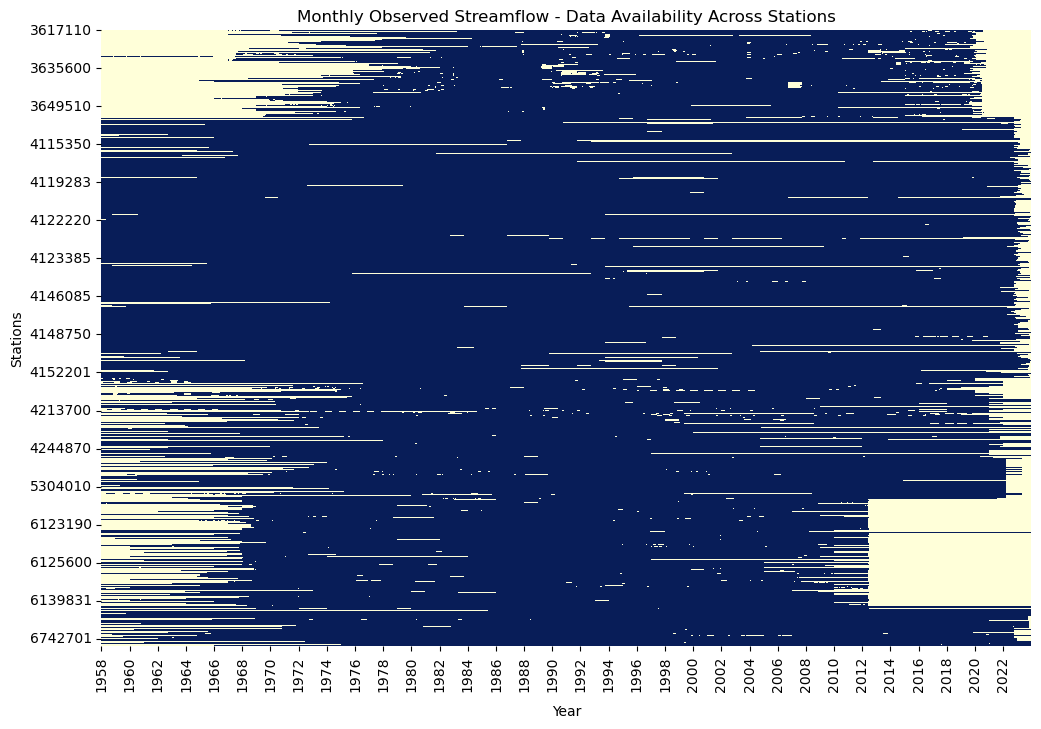

In [100]:
''' Missing Data Heatmap Visualization of the stations that resulted from the determination of the recession constant (k) '''

df_processing = obs_df.copy()
df_processing[sim_sts] # Selecting only the stations that resulted from the previous analysis of recession constant (k) and are in the simulated data.
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)
dates = df_processing.index

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Plot heatmap on the given axis
sns.heatmap(missing_matrix.T, cmap="YlGnBu", cbar=False, yticklabels=50) # Yellow & blue: cmap="YlGnBu" (lighter = missing, darker = available).

# Set x-ticks to show only the first day of every second year
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels, rotation=90)  # Rotate for better visibility

# Adjust space between x-tick labels and x-axis label
ax.set_xlabel("Year", labelpad=10)  # Increase labelpad to add more space

# Labels and title
ax.set_ylabel("Stations")
ax.set_title("Monthly Observed Streamflow - Data Availability Across Stations")

plt.show()

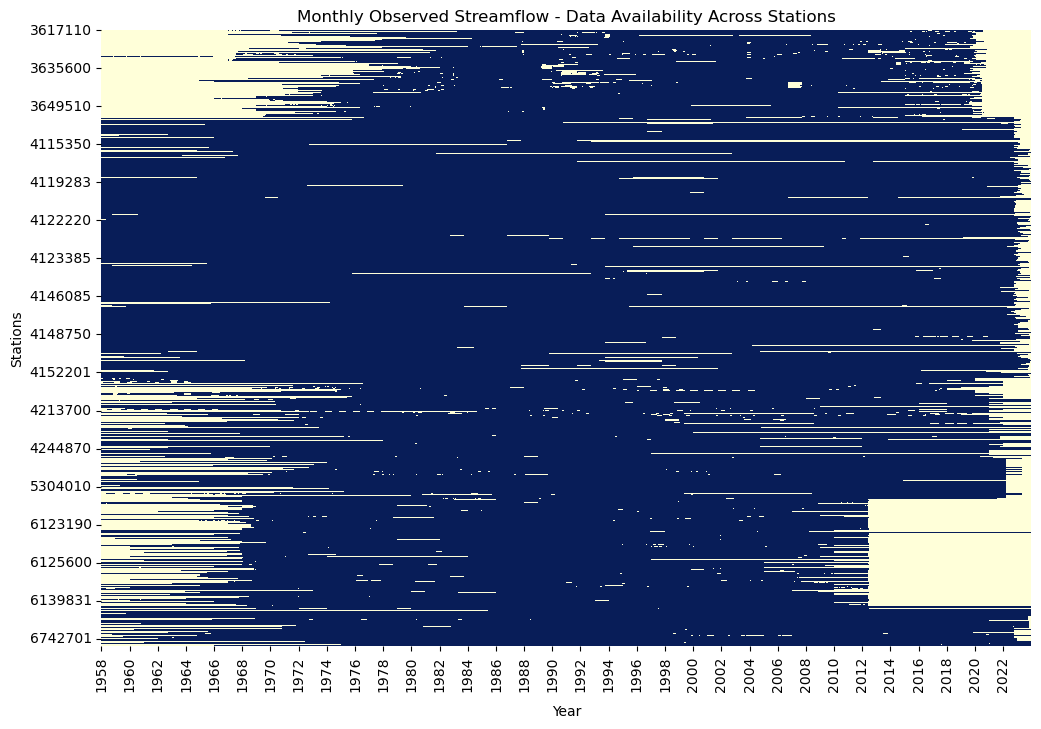

In [101]:
''' Missing Data Heatmap Visualization of the stations that passed the validation analysis '''

df_processing = obs_df.copy()
df_processing[stats_all_years_no_low_r.index] # Select only the stations that passed the validation analysis
df_processing.index = pd.to_datetime(df_processing.index, format='%Y-%m')

# Convert to binary missing data (1 = data exists, 0 = missing)
missing_matrix = df_processing.notna().astype(int)
dates = df_processing.index

# Create a figure and axis explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Plot heatmap on the given axis
sns.heatmap(missing_matrix.T, cmap="YlGnBu", cbar=False, yticklabels=50) # Yellow & blue: cmap="YlGnBu" (lighter = missing, darker = available).

# Set x-ticks to show only the first day of every second year
year_starts = dates[dates.dayofyear == 1]  # Get only the first day of each year
year_starts = year_starts[year_starts.year % 2 == 0]  # Filter to include only even years
xtick_locs = [dates.get_loc(date) for date in year_starts]  # Convert to index positions
xtick_labels = [date.strftime('%Y') for date in year_starts]  # Extract only the year

ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels, rotation=90)  # Rotate for better visibility

# Adjust space between x-tick labels and x-axis label
ax.set_xlabel("Year", labelpad=10)  # Increase labelpad to add more space

# Labels and title
ax.set_ylabel("Stations")
ax.set_title("Monthly Observed Streamflow - Data Availability Across Stations")

plt.show()